In [650]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
pd.options.display.max_columns = None
%matplotlib inline

In [651]:

# Đọc dữ liệu từ file vào các DataFrame
df_vn = pd.read_csv('datasets/vn_chart.csv')
df_features = pd.read_csv('datasets/audio_features.csv')

# Sử dụng phương thức merge để lọc các dòng dữ liệu trong df_features dựa trên cột ID từ df_vn
df_vn_features = df_features.merge(df_vn[['id', 'streams']], on='id', how='inner')



In [652]:
columns_list = [
    'id',
    'danceability',
    'energy',
    'key',
    'loudness',
    'mode',
    'speechiness',
    'acousticness',
    'instrumentalness',
    'liveness',
    'valence',
    'tempo',
    'duration_ms',
    'time_signature',
    'explicit',
    'popularity',
    'release_date',
    'album_id',
    'album_name',
    'track_number',
    'preview_url'
]
df_vn_features = df_vn_features.groupby(columns_list)['streams'].sum().reset_index()
df_vn_features = df_vn_features.drop_duplicates().reset_index(drop=True)

In [653]:
df_vn_features

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,release_date,album_id,album_name,track_number,preview_url,streams
0,014DA3BdnmD3kI5pBogH7c,0.781,0.608,8,-8.452,1,0.0408,0.217000,0.000036,0.1580,0.609,101.017,270000,4,False,60,2020-07-11,7FEh6eJumH2tqhXKfQ5Tul,Cứ Chill Thôi,1,https://p.scdn.co/mp3-preview/9ea977c09a98ac87...,4624195
1,01qFKNWq73UfEslI0GvumE,0.853,0.824,1,-3.287,1,0.1030,0.032200,0.000000,0.0859,0.888,108.044,201812,4,True,0,2023-10-02,0fJ0beklzFwoBv01U8792s,3D : The Remixes,1,https://p.scdn.co/mp3-preview/74f0838fd4469ac2...,8923275
2,02Jf3KszL1FB1kG6CILEWE,0.770,0.779,6,-4.702,1,0.0357,0.289000,0.000039,0.1300,0.775,120.006,231000,4,False,56,2019-11-10,4bWchej4rlCxTeSFSU4baM,Vì Yêu Cứ Đâm Đầu,1,https://p.scdn.co/mp3-preview/81750c3ff7b148fc...,353811
3,02U9EixxU2Znl6ilsr9mrv,0.827,0.761,10,-5.425,0,0.1540,0.000416,0.882000,0.0764,0.378,108.010,199551,4,False,69,2023-09-29,4DKnznk5VbGVvAOYBbQrZJ,3D (feat. Jack Harlow),2,https://p.scdn.co/mp3-preview/20117d5acb5dba9c...,17319
4,02wk5BttM0QL38ERjLPQJB,0.752,0.650,5,-6.683,0,0.1200,0.653000,0.001360,0.1050,0.532,134.993,147880,4,False,85,2023-07-21,4N1fROq2oeyLGAlQ1C1j18,NewJeans 2nd EP 'Get Up',4,https://p.scdn.co/mp3-preview/598e05a7fd20278a...,704482
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,7uQZVznj0uQOGC9KhV2Mg6,0.806,0.653,8,-6.283,1,0.0902,0.028200,0.000784,0.1070,0.850,150.058,200690,4,False,73,2021-09-10,66OYt73mqan1hWa78BhfPd,LALISA,1,https://p.scdn.co/mp3-preview/b2146f99bd4a71f2...,900743
705,7uoFMmxln0GPXQ0AcCBXRq,0.716,0.512,1,-6.257,1,0.0331,0.483000,0.000000,0.0928,0.326,104.957,165907,3,False,77,2018-11-01,2vcGYJcPfXUmCdcXXqqukg,Everyday Is Christmas (Deluxe Edition),3,https://p.scdn.co/mp3-preview/a936030efc27a4fc...,108235
706,7v8v911KfBuFkqXvuDOtNm,0.497,0.862,11,-4.456,0,0.0836,0.301000,0.000000,0.1400,0.574,164.904,165320,4,False,66,2023-04-24,1JBzeeCJ3axQMVkqWbKh0I,SEVENTEEN 10th Mini Album 'FML',5,https://p.scdn.co/mp3-preview/29df45140df98d05...,24512
707,7vAUaVWs9GmNJ6gg8H7FEm,0.720,0.215,9,-12.569,0,0.0382,0.849000,0.000010,0.0912,0.215,116.054,300000,4,False,50,2021-01-04,0Fi86TtvNkCixNSmoqS4Km,Tháng Mấy Em Nhớ Anh?,1,https://p.scdn.co/mp3-preview/1db42241085fddc3...,56024


In [654]:
columns_to_drop = ['album_id', 'album_name', 'track_number','preview_url']
df_vn_features = df_vn_features.drop(columns=columns_to_drop)

In [655]:
print ("(Rows, Columns)= ", df_vn_features.shape)

(Rows, Columns)=  (709, 18)


In [656]:
df_vn_features.duplicated().sum()

0

In [657]:
df_vn_features.dtypes

id                   object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature        int64
explicit               bool
popularity            int64
release_date         object
streams               int64
dtype: object

In [658]:
df_vn_features['release_date'] = pd.to_datetime(df_vn_features['release_date'], format='%Y/%m/%d')

In [659]:
mapping = {True: 1, False: 0}
# Sử dụng map để ánh xạ giá trị trong cột 'explicit'
df_vn_features['explicit'] = df_vn_features['explicit'].map(mapping)

In [660]:
columns = ["acousticness", "danceability", "energy", "speechiness", "liveness", "valence"]
fig = go.Figure()

for col in columns:
    x = df_vn_features.groupby("release_date")[col].mean()
    fig.add_trace(go.Scatter(x=x.index, y=x, mode='lines', name=col))

fig.update_layout(
    title='Audio characteristics over year',
    xaxis_title='Year',
    yaxis_title='Measure'
)

fig.show()


In [661]:
numeric_cols = df_vn_features.select_dtypes(include=np.number).columns.tolist()
df_vn_features[numeric_cols].describe().round(2)

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,streams
count,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.00,709.0,709.00,709.00
mean,0.69,0.59,5.30,-7.66,0.59,0.09,0.40,0.02,0.16,0.49,122.13,208091.28,3.94,0.1,57.59,1747311.15
std,0.13,0.19,3.53,3.57,0.49,0.09,0.30,0.11,0.12,0.21,26.23,47921.69,0.30,0.3,16.55,4296968.53
min,0.19,0.05,0.00,-33.71,0.00,0.02,0.00,0.00,0.02,0.03,49.40,33875.00,1.00,0.0,0.00,5744.00
25%,0.60,0.44,2.00,-9.39,0.00,0.04,0.11,0.00,0.09,0.32,103.06,179173.00,4.00,0.0,50.00,79565.00
50%,0.70,0.60,5.00,-7.14,1.00,0.05,0.36,0.00,0.12,0.47,122.91,203668.00,4.00,0.0,56.00,447396.00
75%,0.78,0.74,8.00,-5.22,1.00,0.10,0.67,0.00,0.19,0.65,137.61,235412.00,4.00,0.0,68.00,1766832.00
max,0.96,0.98,11.00,-0.67,1.00,0.95,1.00,0.92,0.96,0.98,218.06,434865.00,5.00,1.0,100.00,78349617.00


In [662]:
df_vn_features[set(df_vn_features.columns)-set(numeric_cols)].describe()

,id,release_date
count,709,709
unique,709,399
top,014DA3BdnmD3kI5pBogH7c,2023-10-10 00:00:00
freq,1,19
first,NaN,2011-01-01 00:00:00
last,NaN,2023-10-27 00:00:00


In [663]:
missing_ratio = df_vn_features.isna().mean()
print(missing_ratio[(missing_ratio != 0)])

Series([], dtype: float64)


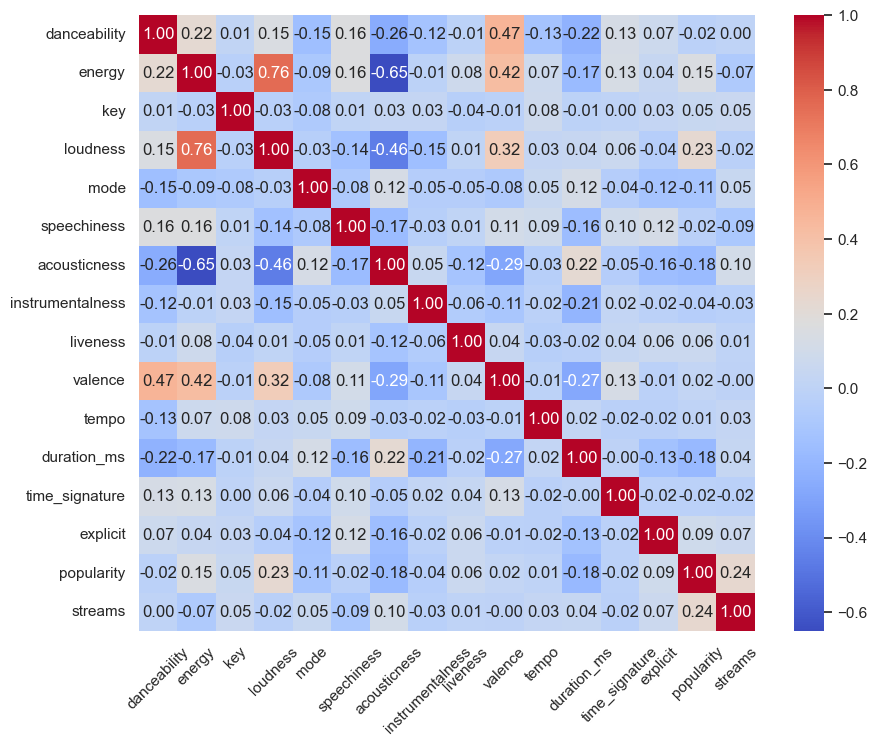

In [664]:
# Tính ma trận tương quan
mtCor = df_vn_features.corr()

# Vẽ biểu đồ
plt.figure(figsize=(10, 8))
sns.heatmap(mtCor, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.xticks(rotation=45)
plt.show()

- Có vẻ như năng lượng (energy) và độ ồn (loudness) có mối tương quan dương mạnh **0.77**. Khi một bản nhạc có năng lượng cao, người nghe cảm nhận được mức độ phấn khích và động lực lớn. Để tạo ra hiệu ứng này, âm thanh cần được làm to hơn và độ lớn âm thanh tăng lên.

- Ngoài ra, tính cảm tích cực (valence) có tương quan dương với khả năng khiêu vũ (danceability) **0.47** và năng lượng (energy) **0.41**. Tương quan giữa tính cảm tích cực, khả năng khiêu vũ và năng lượng trong bản nhạc thường là một yếu tố quan trọng trong việc tạo ra trải nghiệm âm nhạc tích cực, phấn khích, và thúc đẩy người nghe tham gia vào việc khiêu vũ và tận hưởng âm nhạc.

- Bên cạnh đó, mức độ acoustics (acousticness) có tương quan âm cao với năng lượng (energy) **-0.66** và độ lớn âm lượng (loundness) **-0.5**. Điều này cũng có thể lý giải cơ bản:
    - "Acousticness" thể hiện mức độ "tự nhiên" hoặc "acoustic" của một bản nhạc.
    - "Energy" thể hiện mức độ năng lượng trong một bản nhạc, đặc biệt là năng lượng mà người nghe cảm nhận được.
    - "Loudness" đo lường độ lớn của một bản nhạc, tức là mức độ tăng âm lượng.
    - Điều này cho thấy việc sử dụng các nhạc cụ thực (như guitar, piano) thay vì âm thanh tổng hợp hoặc công nghệ âm thanh, góp phần tạo ra một bản nhạc có tính chất yên bình, ít năng động và không cần tạo ra hiệu ứng âm thanh lớn.

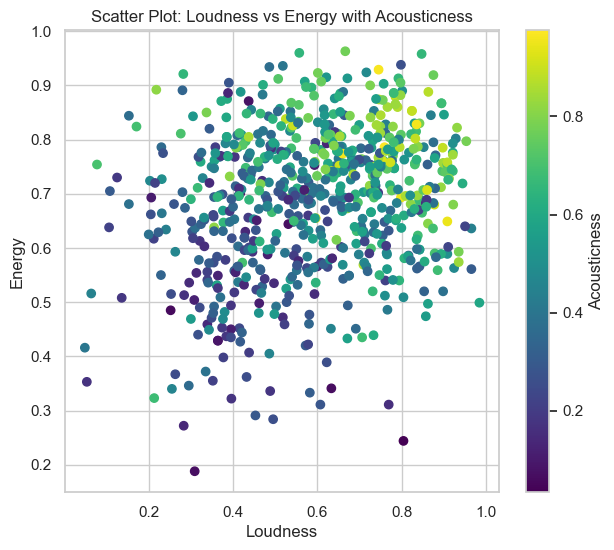

In [665]:
# Extract data for plotting
X = df_vn_features['energy']       # X-axis data: Loudness
Y = df_vn_features['danceability']         # Y-axis data: Energy
Z = df_vn_features['valence']   # Color data: Acousticness

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Create a scatter plot
sc = ax.scatter(X, Y, c=Z, cmap=plt.cm.get_cmap('viridis'))

# Add a color bar to the plot to show the variation in acousticness
fig.colorbar(sc, ax=ax, label='Acousticness')

# Set labels for the X and Y axes
ax.set_xlabel('Loudness')  # Label for X-axis
ax.set_ylabel('Energy')    # Label for Y-axis

# Set the title of the plot
ax.set_title('Scatter Plot: Loudness vs Energy with Acousticness')

# Display the plot
plt.show()

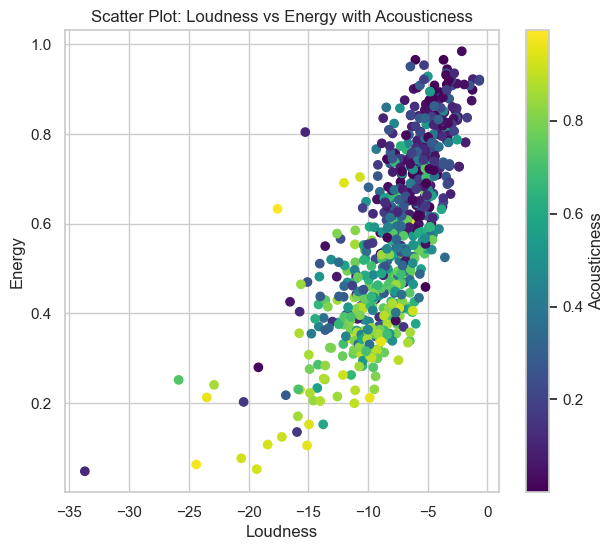

In [666]:
# Extract data for plotting
X = df_vn_features['loudness']       # X-axis data: Loudness
Y = df_vn_features['energy']         # Y-axis data: Energy
Z = df_vn_features['acousticness']   # Color data: Acousticness

# Create a new figure and axis
fig, ax = plt.subplots(figsize=(7, 6))

# Create a scatter plot
sc = ax.scatter(X, Y, c=Z, cmap=plt.cm.get_cmap('viridis'))

# Add a color bar to the plot to show the variation in acousticness
fig.colorbar(sc, ax=ax, label='Acousticness')

# Set labels for the X and Y axes
ax.set_xlabel('Loudness')  # Label for X-axis
ax.set_ylabel('Energy')    # Label for Y-axis

# Set the title of the plot
ax.set_title('Scatter Plot: Loudness vs Energy with Acousticness')

# Display the plot
plt.show()

In [667]:
def scatter_season_plot(data, x, y):
    # Trích xuất thông tin mùa từ cột thời gian
    data['Season'] = df_vn_features['release_date'].dt.month.apply(lambda month: 
        'Spring' if 1 <= month <= 3 else
        'Summer' if 4 <= month <= 6 else
        'Autumn' if 7 <= month <= 9 else
        'Winter'
    )
    
    # Tạo biểu đồ phân tán cho từng mùa
    seasons = ['Spring', 'Summer', 'Autumn', 'Winter']
    plt.figure(figsize=(12, 8))
    
    for i, season in enumerate(seasons):
        plt.subplot(2, 2, i + 1)
        data_season = data[data['Season'] == season]
        plt.scatter(data_season[x], data_season[y], cmap = plt.cm.get_cmap('viridis'))
        plt.title(season)
        plt.xlabel(x)
        plt.ylabel(y)
    
    plt.tight_layout()
    plt.suptitle(f'Scatter Plot of {x} vs. {y} by Season', fontsize=16)
    plt.show()




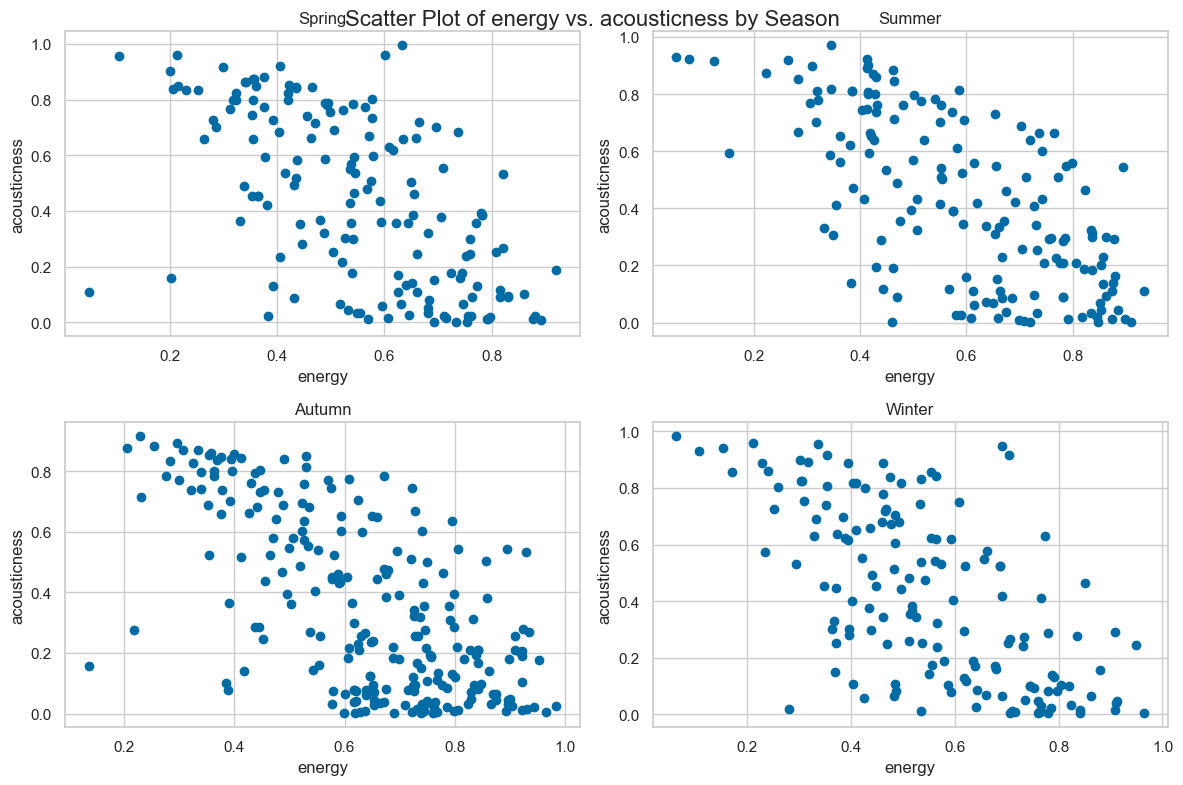

In [668]:
# Sử dụng hàm với dữ liệu và tên các biến x, y, và cột thời gian
scatter_season_plot(df_vn_features, 'energy', 'acousticness')

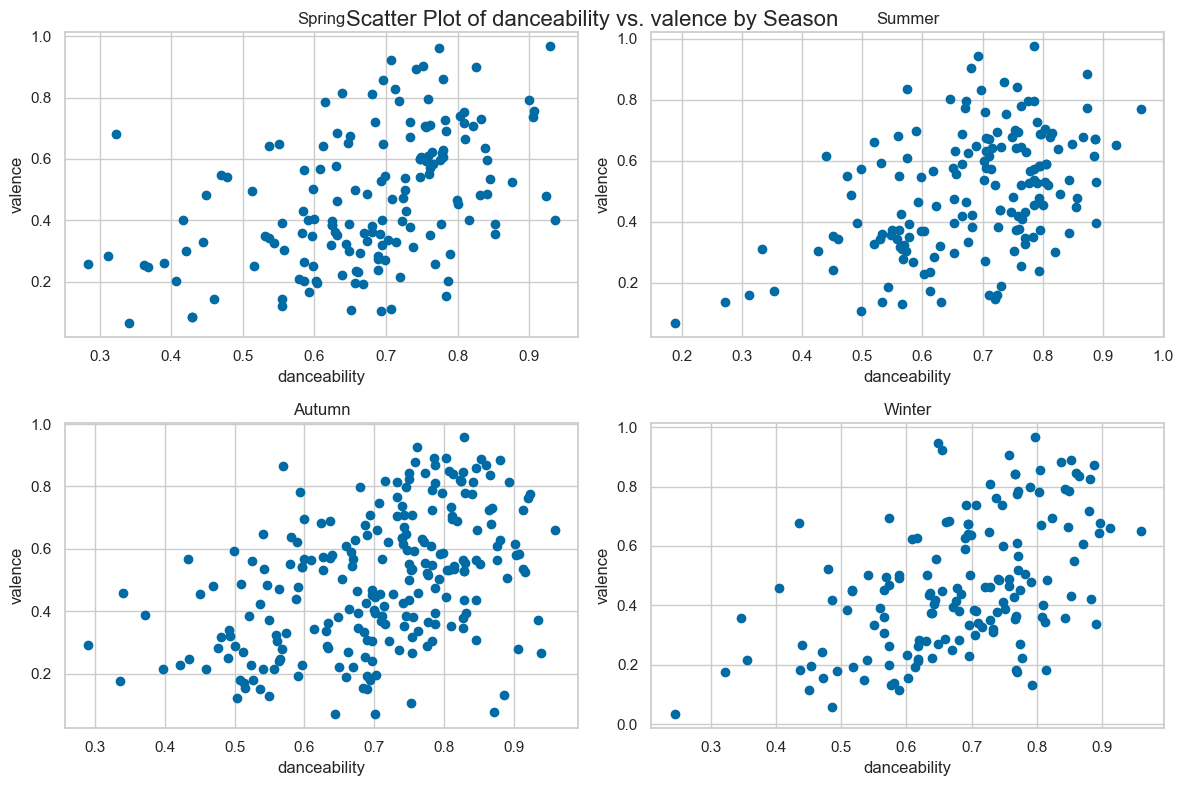

In [669]:
# Sử dụng hàm với dữ liệu và tên các biến x, y, và cột thời gian
scatter_season_plot(df_vn_features, 'danceability', 'valence')

#### Phân tích phân phối Key

In [670]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# Chuyển khóa từ số sang chữ
key_mapping = {
    0: "C", 1: "C♯,D♭", 2: "D",3: "D♯,E♭", 4: "E",
    5: "F", 6: "F♯,G♭", 7: "G", 8: "G♯,A♭",9: "A",
    10: "A♯,B♭", 11: "B"
}

df_vn_features['key'] = df_vn_features['key'].map(key_mapping)
df_vn_features['key']

0      G♯,A♭
1      C♯,D♭
2      F♯,G♭
3      A♯,B♭
4          F
       ...  
704    G♯,A♭
705    C♯,D♭
706        B
707        A
708        B
Name: key, Length: 709, dtype: object

In [671]:
# Tính số lần xuất hiện của mỗi khóa
song_keys = df_vn_features['key'].value_counts().reset_index()
song_keys.columns = ['key', 'n_key']
# Sắp xếp theo số lần xuất hiện giảm dần
song_keys = song_keys.sort_values(by='n_key', ascending=False)
song_keys

,key,n_key
0,F,79
1,"C♯,D♭",74
2,C,74
3,D,71
4,A,70
5,"G♯,A♭",61
6,G,59
7,B,55
8,"F♯,G♭",52
9,"A♯,B♭",45


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

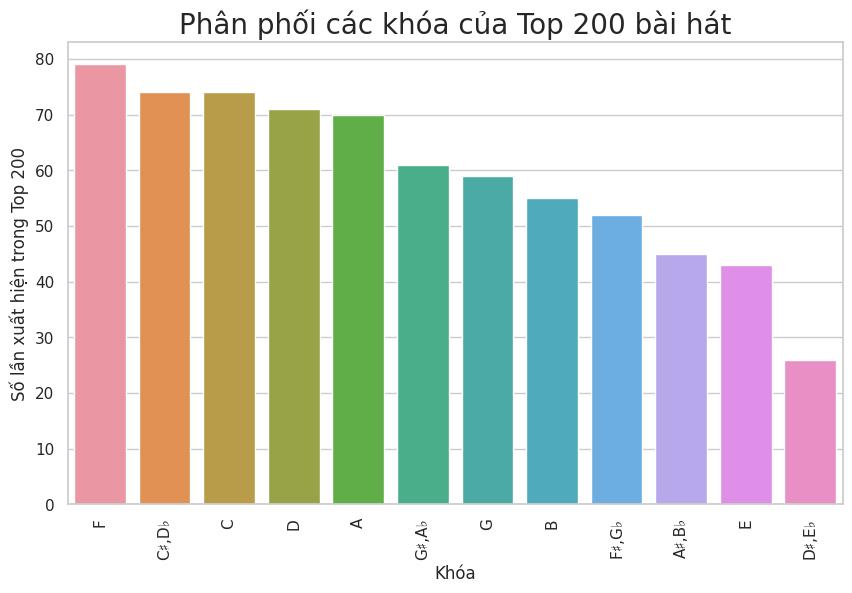

In [672]:
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('tableau-colorblind10')

sns.barplot(song_keys,x='key', y='n_key')
sns.color_palette("husl", 9)
plt.title('Phân phối các khóa của Top 200 bài hát', fontweight = 30, fontsize = 20)
plt.xlabel('Khóa')
plt.ylabel('Số lần xuất hiện trong Top 200')
plt.xticks(rotation = 90)
plt.show()

In [673]:
#label encoding or one hot encoding?
df_features = df_vn_features.copy()
df_features = pd.get_dummies(df_features, columns=['key', 'mode'], prefix=['key', 'mode'])
df_features['key'] = df_vn_features['key']
df_features

,id,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,release_date,streams,Season,key_A,"key_A♯,B♭",key_B,key_C,"key_C♯,D♭",key_D,"key_D♯,E♭",key_E,key_F,"key_F♯,G♭",key_G,"key_G♯,A♭",mode_0,mode_1,key
0,014DA3BdnmD3kI5pBogH7c,0.781,0.608,-8.452,0.0408,0.217000,0.000036,0.1580,0.609,101.017,270000,4,0,60,2020-07-11,4624195,Autumn,0,0,0,0,0,0,0,0,0,0,0,1,0,1,"G♯,A♭"
1,01qFKNWq73UfEslI0GvumE,0.853,0.824,-3.287,0.1030,0.032200,0.000000,0.0859,0.888,108.044,201812,4,1,0,2023-10-02,8923275,Winter,0,0,0,0,1,0,0,0,0,0,0,0,0,1,"C♯,D♭"
2,02Jf3KszL1FB1kG6CILEWE,0.770,0.779,-4.702,0.0357,0.289000,0.000039,0.1300,0.775,120.006,231000,4,0,56,2019-11-10,353811,Winter,0,0,0,0,0,0,0,0,0,1,0,0,0,1,"F♯,G♭"
3,02U9EixxU2Znl6ilsr9mrv,0.827,0.761,-5.425,0.1540,0.000416,0.882000,0.0764,0.378,108.010,199551,4,0,69,2023-09-29,17319,Autumn,0,1,0,0,0,0,0,0,0,0,0,0,1,0,"A♯,B♭"
4,02wk5BttM0QL38ERjLPQJB,0.752,0.650,-6.683,0.1200,0.653000,0.001360,0.1050,0.532,134.993,147880,4,0,85,2023-07-21,704482,Autumn,0,0,0,0,0,0,0,0,1,0,0,0,1,0,F
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,7uQZVznj0uQOGC9KhV2Mg6,0.806,0.653,-6.283,0.0902,0.028200,0.000784,0.1070,0.850,150.058,200690,4,0,73,2021-09-10,900743,Autumn,0,0,0,0,0,0,0,0,0,0,0,1,0,1,"G♯,A♭"
705,7uoFMmxln0GPXQ0AcCBXRq,0.716,0.512,-6.257,0.0331,0.483000,0.000000,0.0928,0.326,104.957,165907,3,0,77,2018-11-01,108235,Winter,0,0,0,0,1,0,0,0,0,0,0,0,0,1,"C♯,D♭"
706,7v8v911KfBuFkqXvuDOtNm,0.497,0.862,-4.456,0.0836,0.301000,0.000000,0.1400,0.574,164.904,165320,4,0,66,2023-04-24,24512,Summer,0,0,1,0,0,0,0,0,0,0,0,0,1,0,B
707,7vAUaVWs9GmNJ6gg8H7FEm,0.720,0.215,-12.569,0.0382,0.849000,0.000010,0.0912,0.215,116.054,300000,4,0,50,2021-01-04,56024,Spring,1,0,0,0,0,0,0,0,0,0,0,0,1,0,A


In [677]:
palette = px.colors.qualitative.Set2
# Vẽ biểu đồ catplot
fig = px.box(df_features, y="key", x="streams", color="key", template="plotly_white", color_discrete_sequence=palette)
fig.update_layout(
    yaxis_title="Keys",
    xaxis_title="Streams",
    title='Box Plot of Streams by Keys'
)
fig.show()

In [679]:
result_df = df_features.groupby('key')['streams'].agg(['mean', 'min', 'max']).reset_index()
result_df = result_df.rename(columns={'mean': 'avg_streams', 'min': 'min_streams', 'max': 'max_streams'})
result_df.head(10)

,key,avg_streams,min_streams,max_streams
0,A,2.153086e+06,6137,16696482
1,"A♯,B♭",1.283231e+06,14673,9879878
2,B,3.027960e+06,5906,78349617
3,C,1.988474e+06,7332,15649747
4,"C♯,D♭",1.190150e+06,10128,8923275
5,D,1.509145e+06,5744,22382575
6,"D♯,E♭",2.077888e+06,18068,15057926
7,E,1.283009e+06,11320,8432975
8,F,1.370192e+06,5965,11883770
9,"F♯,G♭",1.212240e+06,8448,10096421


In [682]:
# Sử dụng Plotly để vẽ biểu đồ dạng đường
fig = go.Figure()

# Melt DataFrame để biến đổi dữ liệu thành dạng phù hợp cho Plotly
melted_df = pd.melt(result_df, id_vars='key', var_name='variable', value_name='value')

# Vẽ biểu đồ dạng đường cho từng biến
for variable in melted_df['variable'].unique():
    subset = melted_df[melted_df['variable'] == variable]
    fig.add_trace(go.Scatter(x=subset['key'], y=subset['value'], mode='lines', name=variable))

# Cài đặt tiêu đề và ghi chú
fig.update_layout(
    title='Average, Minimum, and Maximum Streams by Key',
    xaxis_title='Key',
    yaxis_title='Value',
)

fig.show()

In [691]:
key_colors = {
    'key_A': 'red',
    'key_A♯,B♭': 'blue',
    'key_B': 'green',
    'key_C': 'purple',
    'key_C♯,D♭': 'orange',
    'key_D': 'cyan',

    'key_D♯,E♭': 'magenta',
    'key_E': 'yellow',
    'key_F': 'lime',
    'key_F♯,G♭': 'pink',
    'key_G': 'brown',
    'key_G♯,A♭': 'gray'
}

key_columns = ['key_A', 'key_A♯,B♭', 'key_B',
       'key_C', 'key_C♯,D♭', 'key_D', 'key_D♯,E♭', 'key_E', 'key_F',
       'key_F♯,G♭', 'key_G', 'key_G♯,A♭']
key_df = df_features[key_columns]

In [697]:
top_10_songs = df_features.nlargest(10, 'streams')
top_50_songs = df_features.nlargest(50, 'streams')
top_100_songs = df_features.nlargest(100, 'streams')

last_10_songs = df_features.nsmallest(10, 'streams')
last_50_songs = df_features.nsmallest(50, 'streams')
last_100_songs = df_features.nsmallest(100, 'streams')


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

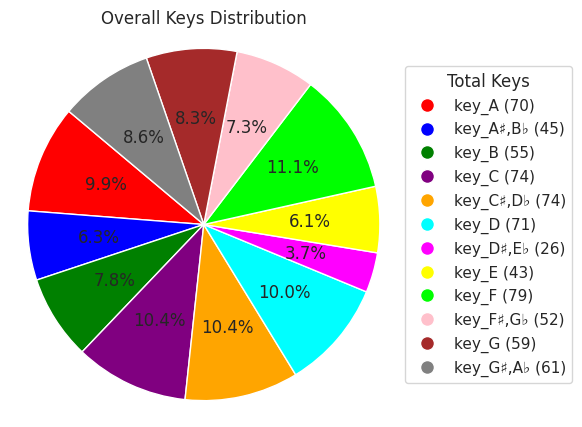

In [695]:
key_counts = key_df.eq(1).sum()

plt.figure(figsize=(5, 5))
plt.pie(key_counts, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts.index])
plt.title('Overall Keys Distribution')
plt.axis('equal')

legend_labels = [key + f" ({key_counts[key]})" for key in key_counts.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts.index)]
plt.legend(handles=legend_patches, loc='center left', bbox_to_anchor=(1, 0.5), title='Total Keys')

plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

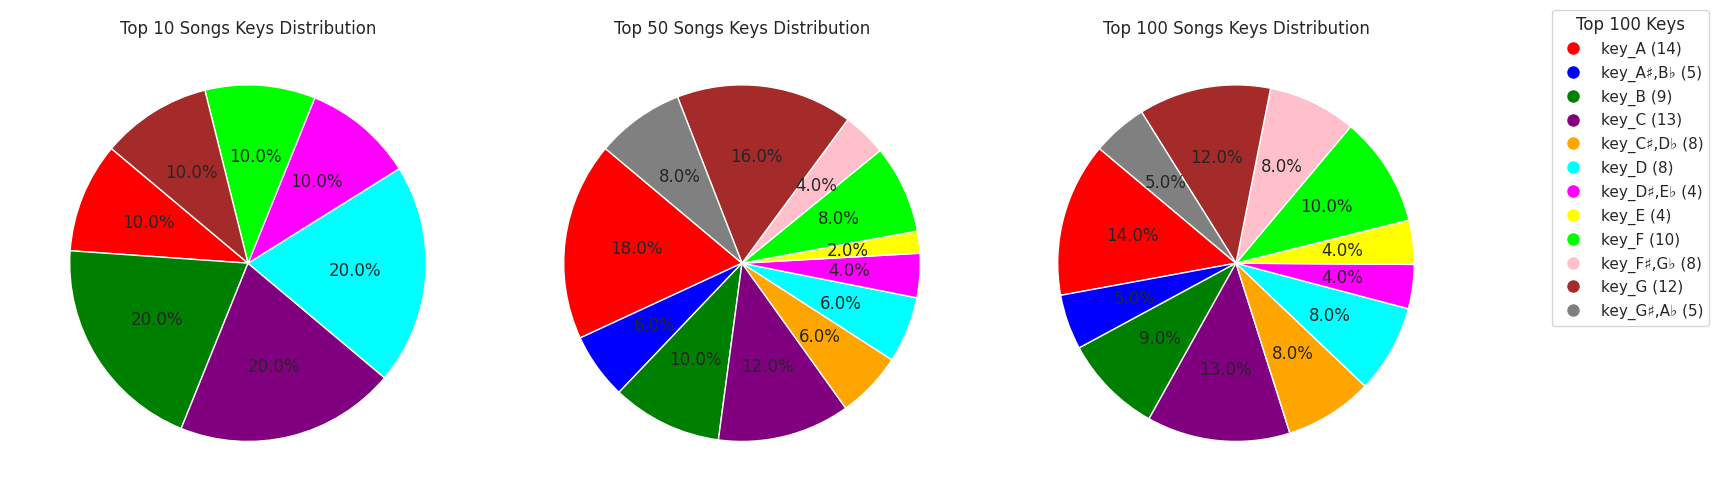

In [696]:
dataframes = [top_10_songs, top_50_songs, top_100_songs]

chart_titles = ['Top 10 Songs Keys Distribution', 'Top 50 Songs Keys Distribution', 'Top 100 Songs Keys Distribution']

fig, axes = plt.subplots(1, len(dataframes), figsize=(15, 5))

for i, (df_da_copy, title) in enumerate(zip(dataframes, chart_titles)):
    key_df = df_da_copy[key_columns]

    key_counts = key_df.eq(1).sum()

    key_counts_filtered = key_counts[key_counts > 0]

    ax = axes[i]
    ax.pie(key_counts_filtered, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts_filtered.index])
    ax.set_title(title)
    ax.axis('equal') 

legend_labels = [key + f" ({key_counts_filtered[key]})" for key in key_counts_filtered.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts_filtered.index)]
fig.legend(handles=legend_patches, loc='upper right', title='Top 100 Keys', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()

findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

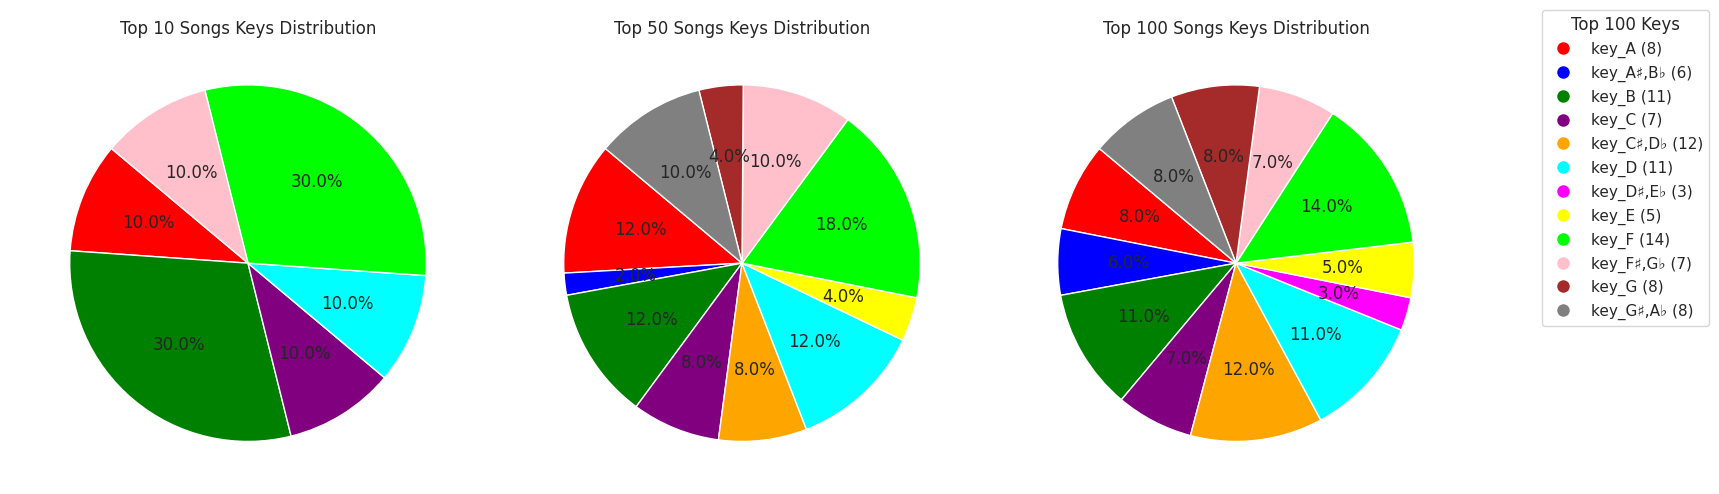

In [698]:
dataframes = [last_10_songs, last_50_songs, last_100_songs]

chart_titles = ['Top 10 Songs Keys Distribution', 'Top 50 Songs Keys Distribution', 'Top 100 Songs Keys Distribution']

fig, axes = plt.subplots(1, len(dataframes), figsize=(15, 5))

for i, (df_da_copy, title) in enumerate(zip(dataframes, chart_titles)):
    key_df = df_da_copy[key_columns]

    key_counts = key_df.eq(1).sum()

    key_counts_filtered = key_counts[key_counts > 0]

    ax = axes[i]
    ax.pie(key_counts_filtered, labels=None, autopct='%1.1f%%', startangle=140, colors=[key_colors[key] for key in key_counts_filtered.index])
    ax.set_title(title)
    ax.axis('equal') 

legend_labels = [key + f" ({key_counts_filtered[key]})" for key in key_counts_filtered.index]
legend_patches = [plt.Line2D([0], [0], marker='o', color='w', label=label, markersize=10, markerfacecolor=key_colors[key]) for label, key in zip(legend_labels, key_counts_filtered.index)]
fig.legend(handles=legend_patches, loc='upper right', title='Top 100 Keys', bbox_to_anchor=(1.15, 1))

plt.tight_layout()
plt.show()